In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sb
import matplotlib.pyplot as plt

# Read CSV Files
### List of all CSV files

In [3]:
print('### All DataFrames ###')
for idx, file in enumerate(os.listdir('cleaned-dataframes')):
    print(idx, '-', file)

### All DataFrames ###
0 - customerData.csv
1 - leadData.csv
2 - orderData.csv
3 - productData.csv
4 - sellerData.csv


### Read to `DataFrames`

In [4]:
customerData = pd.read_csv('cleaned-dataframes/customerData.csv')
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_state      99441 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [5]:
productData = pd.read_csv('cleaned-dataframes/productData.csv')
productData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
 9   product_volume              32949 non-null  float64
 10  product_density             32949 non-null  float64
 11  product_items_sold          32951 non-null  int64  
 12  product_rating              32951 non-null  float64
 13  product_polarity            329

In [6]:
sellerData = pd.read_csv('cleaned-dataframes/sellerData.csv')
sellerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   seller_id          3095 non-null   object
 1   seller_state       3095 non-null   object
 2   seller_items_sold  3095 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 72.7+ KB


In [7]:
leadData = pd.read_csv('cleaned-dataframes/leadData.csv')
leadData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   seller_id               380 non-null    object 
 1   business_segment        380 non-null    object 
 2   lead_type               377 non-null    object 
 3   lead_behaviour_profile  289 non-null    object 
 4   business_type           377 non-null    object 
 5   days_to_first_sale      380 non-null    float64
 6   deal_days               380 non-null    float64
dtypes: float64(2), object(5)
memory usage: 20.9+ KB


In [8]:
orderData = pd.read_csv('cleaned-dataframes/orderData.csv')
orderData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118318 entries, 0 to 118317
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              118318 non-null  object 
 1   seller_id             118318 non-null  object 
 2   product_id            118318 non-null  object 
 3   customer_id           118318 non-null  object 
 4   review_id             118318 non-null  object 
 5   order_status          118318 non-null  object 
 6   price                 118318 non-null  float64
 7   payment_type          118315 non-null  object 
 8   payment_installments  118315 non-null  float64
 9   payment_time          118303 non-null  float64
 10  lead_time             115730 non-null  float64
 11  delivery_performance  115730 non-null  float64
 12  review_time           118318 non-null  int64  
 13  review_score          118318 non-null  int64  
 14  review_en             50668 non-null   object 
 15  

## Data exploration & visualisation

### Customer State: categorical
### Response 1: seller

In [58]:
customerData["customer_state"].value_counts()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

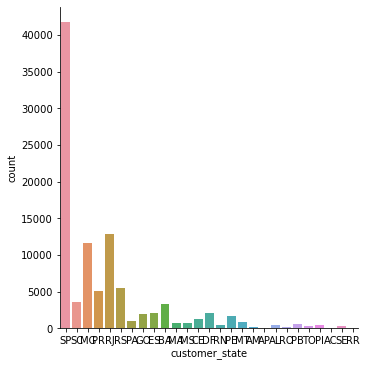

In [59]:
sb.catplot(data=customerData, x="customer_state", kind="count")

<AxesSubplot:xlabel='customer_state', ylabel='seller_items_sold'>

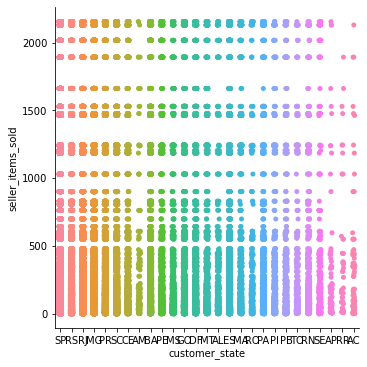

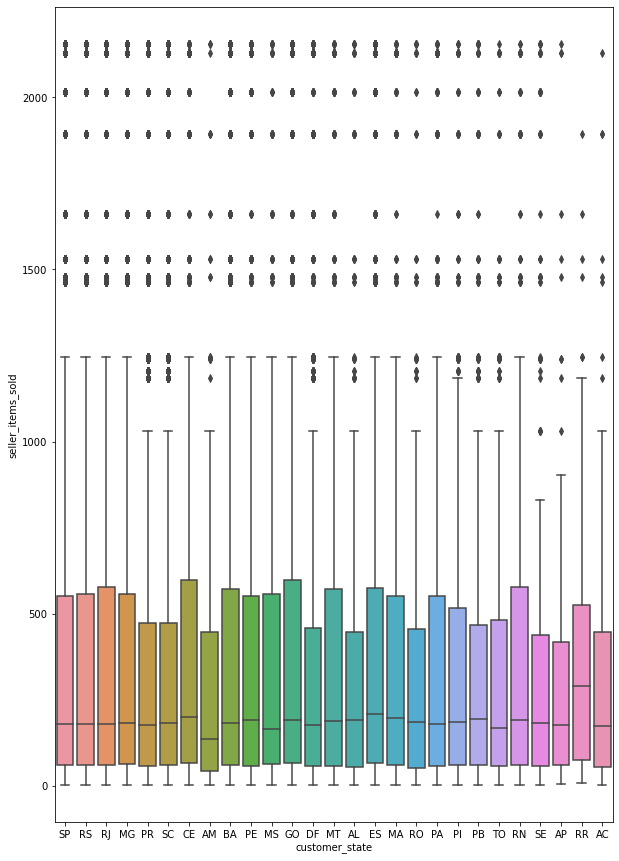

In [60]:
# get customer states for each unique seller
temp = orderData.merge(customerData, on="customer_id").merge(sellerData, on="seller_id")
temp.drop_duplicates(subset=["customer_id", "seller_id"], inplace=True)

# visualisation
sb.catplot(data = temp, x="customer_state", y="seller_items_sold")

fig = plt.figure(figsize = (10,15))
sb.boxplot(x = "customer_state", y= "seller_items_sold", data = temp)

In [61]:
# top 12 states
top = {"SP", "RJ", "MG", "RS", "PR", "SC", "BA", "DF", "ES", "GO", "PE", "CE"}
c = customerData.loc[((customerData["customer_state"] == 'SP') |\
                      (customerData["customer_state"] == 'RJ') |\
                      (customerData["customer_state"] == 'MG') |\
                      (customerData["customer_state"] == 'RS') |\
                      (customerData["customer_state"] == 'PR') |\
                      (customerData["customer_state"] == 'SC') |\
                      (customerData["customer_state"] == 'BA') |\
                      (customerData["customer_state"] == 'DF') |\
                      (customerData["customer_state"] == 'ES') |\
                      (customerData["customer_state"] == 'GO') |\
                      (customerData["customer_state"] == 'PE') |\
                      (customerData["customer_state"] == 'CE')),:]
c

,customer_id,customer_unique_id,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,SP
...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,RS


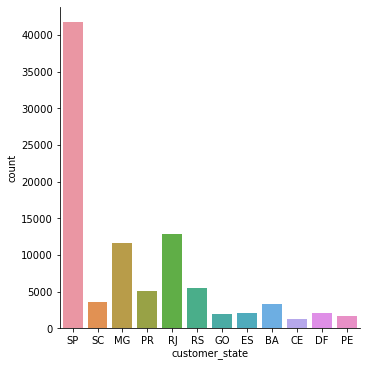

In [62]:
sb.catplot(data=c, x="customer_state", kind="count")

<AxesSubplot:xlabel='customer_state', ylabel='seller_items_sold'>

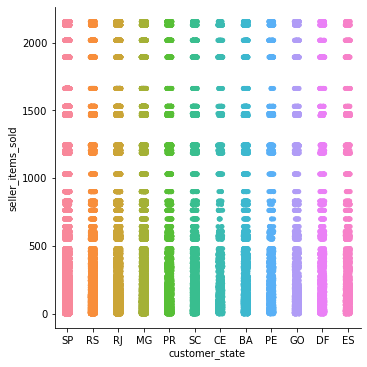

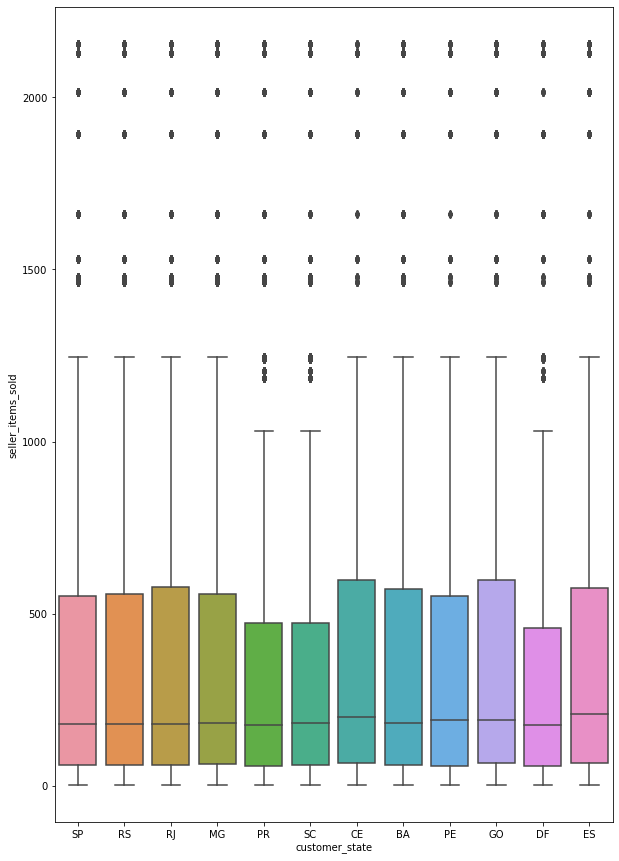

In [63]:
# top 12 states (in terms of no. of sellers)
# get customer states for each unique seller
temp = orderData.merge(c, on="customer_id").merge(sellerData, on="seller_id")
temp.drop_duplicates(subset=["customer_id", "seller_id"], inplace=True)

# visualisation
sb.catplot(data = temp, x="customer_state", y="seller_items_sold")

fig = plt.figure(figsize = (10,15))
sb.boxplot(x = "customer_state", y= "seller_items_sold", data = temp)

### Customer State: categorical
### Response 2: product

<AxesSubplot:xlabel='customer_state', ylabel='product_items_sold'>

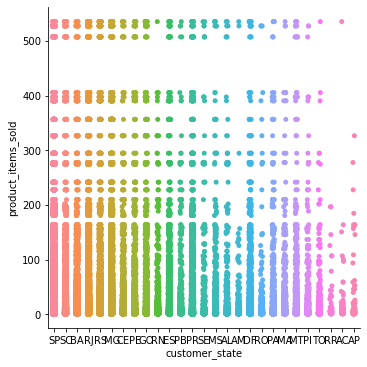

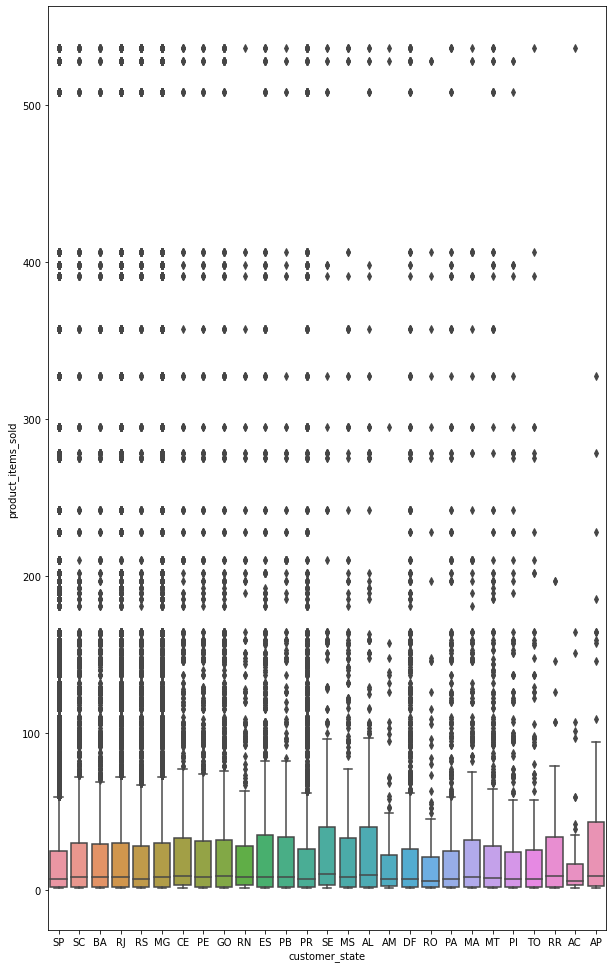

In [64]:
# get customer states for each unique product
temp = orderData.merge(customerData, on="customer_id").merge(productData, on="product_id")
temp.drop_duplicates(subset=["customer_id", "product_id"], inplace=True)

# visualisation
sb.catplot(data = temp, x="customer_state", y="product_items_sold")

fig = plt.figure(figsize = (10,17))
sb.boxplot(x = "customer_state", y= "product_items_sold", data = temp)

<AxesSubplot:xlabel='customer_state', ylabel='product_items_sold'>

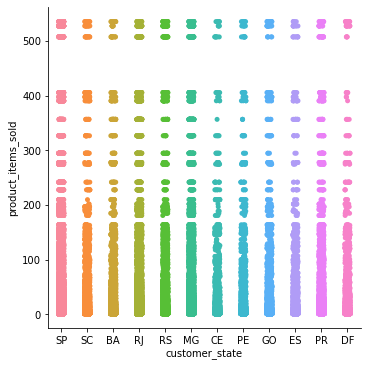

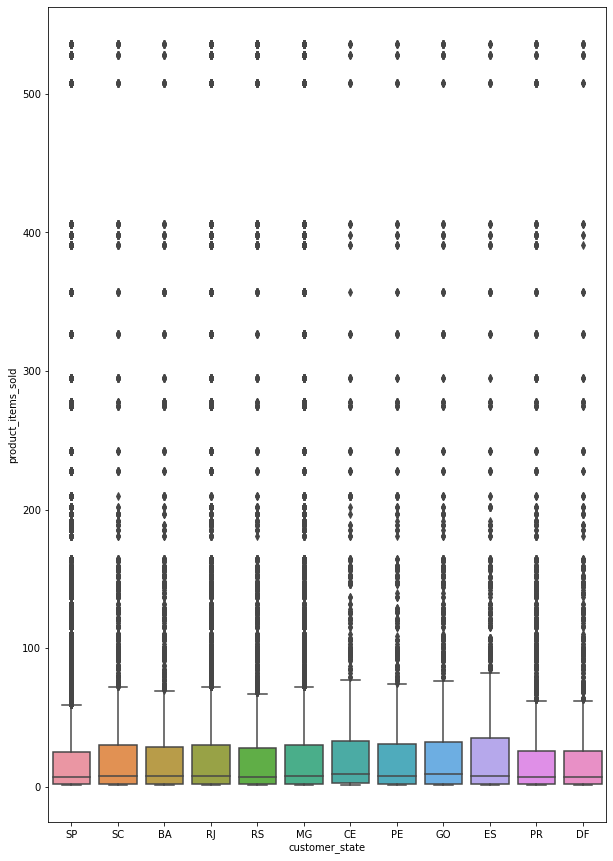

In [65]:
# top 12 states (in terms of no. of sellers)
# get customer states for each unique product
temp = orderData.merge(c, on="customer_id").merge(productData, on="product_id")
temp.drop_duplicates(subset=["customer_id", "product_id"], inplace=True)

# visualisation
sb.catplot(data = temp, x="customer_state", y="product_items_sold")

fig = plt.figure(figsize = (10,15))
sb.boxplot(x = "customer_state", y= "product_items_sold", data = temp)

### Seller State: categorical
### Response 1: seller

In [66]:
sellerData["seller_state"].value_counts()

SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
SE       2
RO       2
PI       1
AC       1
MA       1
AM       1
PA       1
Name: seller_state, dtype: int64

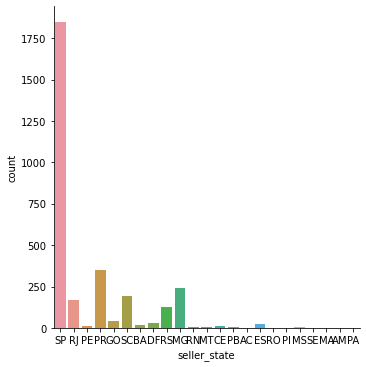

In [67]:
sb.catplot(data=sellerData, x="seller_state", kind="count")

<AxesSubplot:xlabel='seller_state', ylabel='seller_items_sold'>

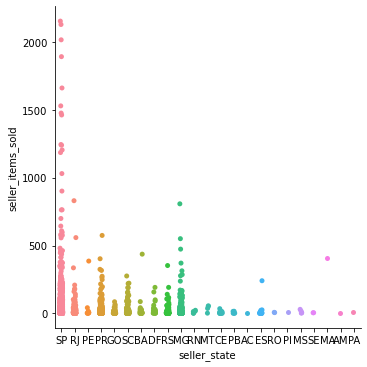

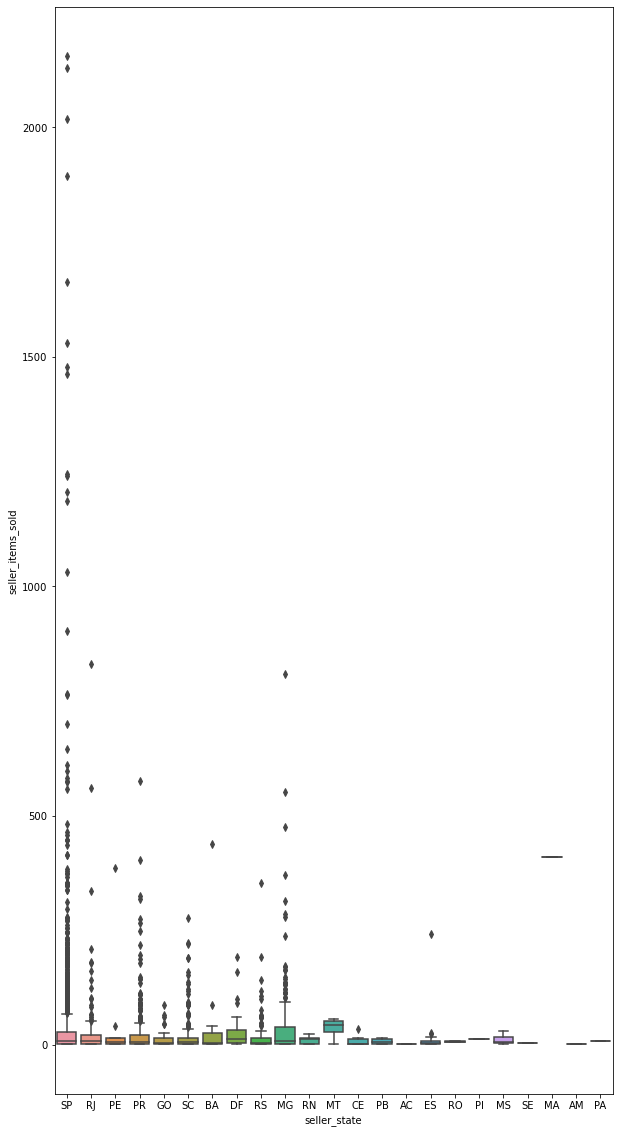

In [69]:
# visualisation
sb.catplot(data = sellerData, x="seller_state", y="seller_items_sold")

fig = plt.figure(figsize = (10,20))
sb.boxplot(x = "seller_state", y= "seller_items_sold", data = sellerData)

In [70]:
# top 12 states
top = {"SP", "RJ", "MG", "RS", "PR", "SC", "BA", "DF", "ES", "GO", "PE", "CE"}
s = sellerData.loc[((sellerData["seller_state"] == 'SP') |\
                    (sellerData["seller_state"] == 'RJ') |\
                    (sellerData["seller_state"] == 'MG') |\
                    (sellerData["seller_state"] == 'RS') |\
                    (sellerData["seller_state"] == 'PR') |\
                    (sellerData["seller_state"] == 'SC') |\
                    (sellerData["seller_state"] == 'BA') |\
                    (sellerData["seller_state"] == 'DF') |\
                    (sellerData["seller_state"] == 'ES') |\
                    (sellerData["seller_state"] == 'GO') |\
                    (sellerData["seller_state"] == 'PE') |\
                    (sellerData["seller_state"] == 'CE')),:]
s

,seller_id,seller_state,seller_items_sold
0,3442f8959a84dea7ee197c632cb2df15,SP,3
1,d1b65fc7debc3361ea86b5f14c68d2e2,SP,43
2,ce3ad9de960102d0677a81f5d0bb7b2d,RJ,1
3,c0f3eea2e14555b6faeea3dd58c1b1c3,SP,1
4,51a04a8a6bdcb23deccc82b0b80742cf,SP,2
...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,PR,2
3091,f8201cab383e484733266d1906e2fdfa,SC,10
3092,74871d19219c7d518d0090283e03c137,SP,7
3093,e603cf3fec55f8697c9059638d6c8eb5,RS,11


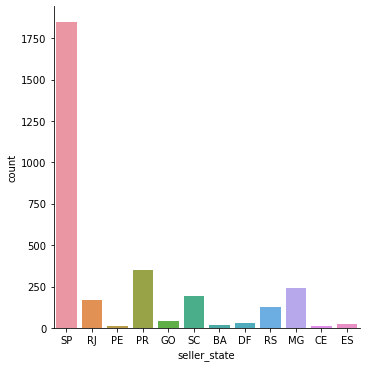

In [71]:
sb.catplot(data=s, x="seller_state", kind="count")

<AxesSubplot:xlabel='seller_state', ylabel='seller_items_sold'>

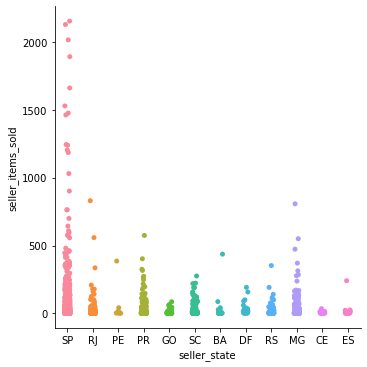

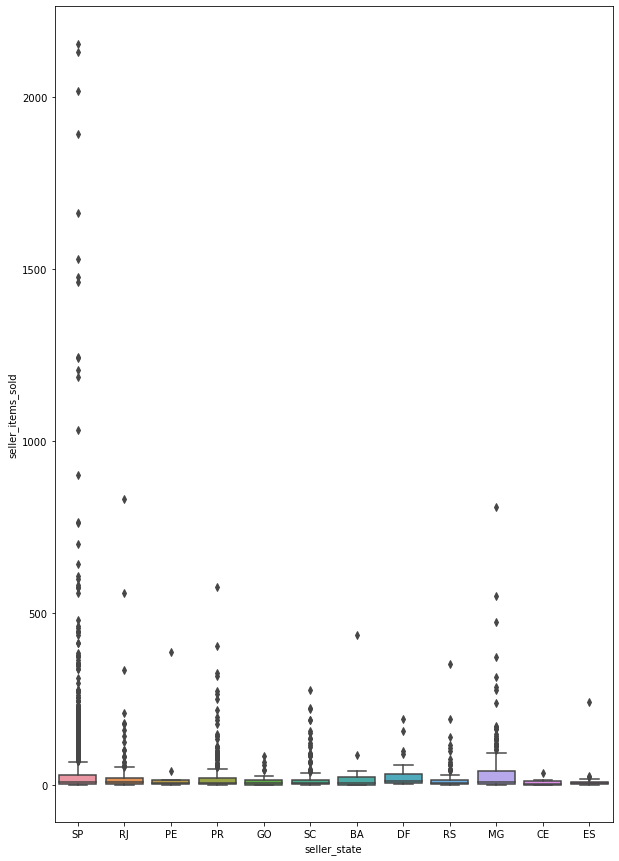

In [72]:
# visualisation
sb.catplot(data = s, x="seller_state", y="seller_items_sold")

fig = plt.figure(figsize = (10,15))
sb.boxplot(x = "seller_state", y= "seller_items_sold", data = s)

### Seller State: categorical
### Response 2: product

<AxesSubplot:xlabel='seller_state', ylabel='product_items_sold'>

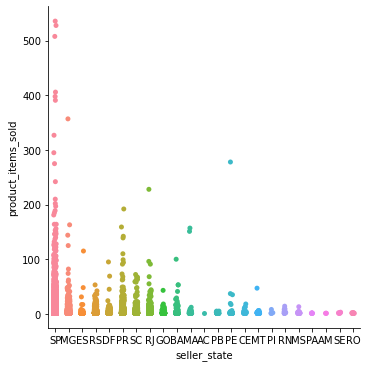

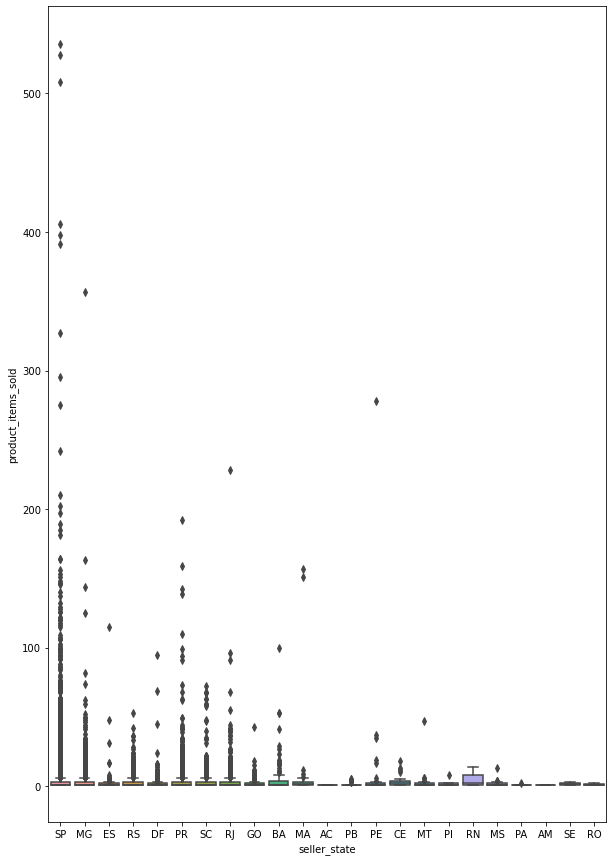

In [78]:
# get seller state for each unique product
temp = orderData.merge(sellerData, on="seller_id").merge(productData, on="product_id")
temp.drop_duplicates(subset=["product_id"], inplace=True)

# visualisation
sb.catplot(data = temp, x="seller_state", y="product_items_sold")

fig = plt.figure(figsize = (10,15))
sb.boxplot(x = "seller_state", y= "product_items_sold", data = temp)

<AxesSubplot:xlabel='seller_state', ylabel='product_items_sold'>

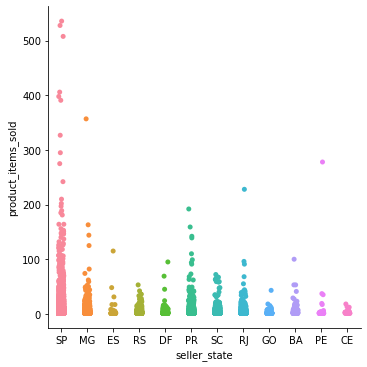

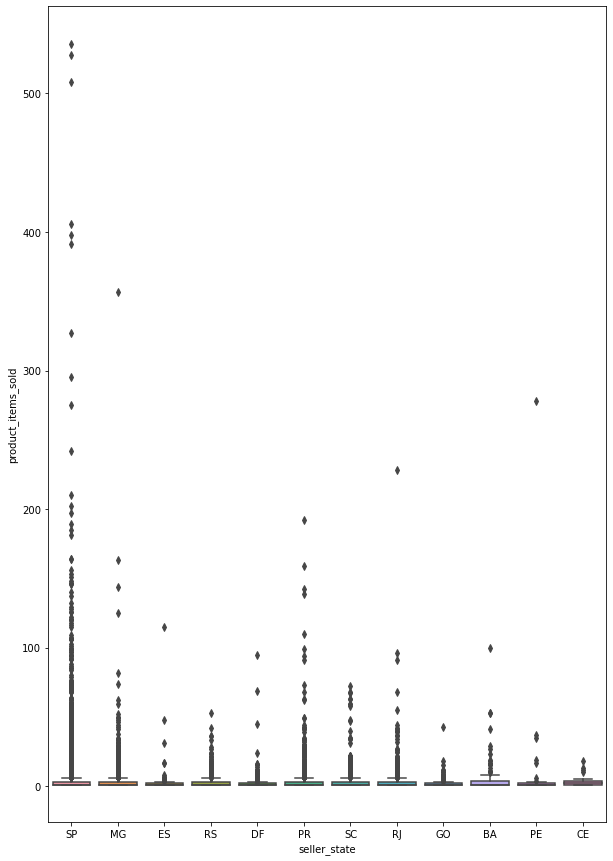

In [79]:
# for top 12 states in terms of no. of sellers
# get seller state for each unique product
temp = orderData.merge(s, on="seller_id").merge(productData, on="product_id")
temp.drop_duplicates(subset=["product_id"], inplace=True)

# visualisation
sb.catplot(data = temp, x="seller_state", y="product_items_sold")

fig = plt.figure(figsize = (10,15))
sb.boxplot(x = "seller_state", y= "product_items_sold", data = temp)

### leadData - Business Segment: categorical
### Response 1: seller

In [80]:
leadData["business_segment"].value_counts()

electronics            48
health_beauty          45
home_decor             44
household_utilities    44
tools                  32
car_accessories        30
pet                    17
food                   17
sports_leisure         14
appliances             14
bags_backpacks         14
furniture              13
toys                   10
hobbies                 9
fashion_accessories     9
gifts                   7
stationery              7
baby                    6
Name: business_segment, dtype: int64

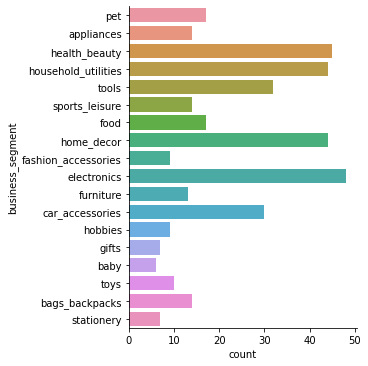

In [81]:
sb.catplot(data=leadData, y="business_segment", kind="count")

<AxesSubplot:xlabel='seller_items_sold', ylabel='business_segment'>

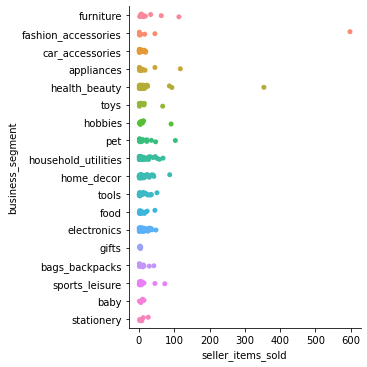

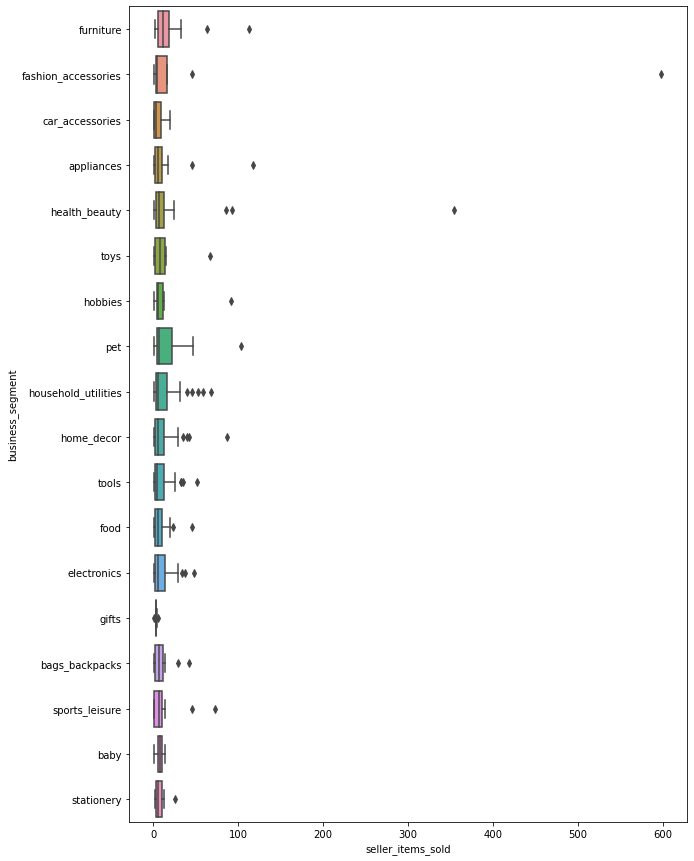

In [82]:
# merge lead & seller data
temp = sellerData.merge(leadData, on="seller_id")

# visualisation
sb.catplot(data = temp, x="seller_items_sold", y="business_segment")

fig = plt.figure(figsize = (10,15))
sb.boxplot(x = "seller_items_sold", y= "business_segment", data = temp)

In [83]:
# top 8 segments

l = leadData.loc[((leadData["business_segment"] == 'electronics') |\
                    (leadData["business_segment"] == 'health_beauty') |\
                    (leadData["business_segment"] == 'home_decor') |\
                    (leadData["business_segment"] == 'household_utilities') |\
                    (leadData["business_segment"] == 'tools') |\
                    (leadData["business_segment"] == 'car_accessories') |\
                    (leadData["business_segment"] == 'pet') |\
                    (leadData["business_segment"] == 'food')),:]
l

,seller_id,business_segment,lead_type,lead_behaviour_profile,business_type,days_to_first_sale,deal_days
0,2c43fb513632d29b3b58df74816f1b06,pet,online_medium,cat,reseller,114.0,5.0
3,1c742ac33582852aaf3bcfbf5893abcf,health_beauty,online_medium,NaN,manufacturer,135.0,1.0
4,44ed138eca6214d572ce1d813fb0049b,health_beauty,offline,cat,manufacturer,112.0,4.0
5,87d73636a3acf123e842bb890a4db036,household_utilities,online_medium,eagle,manufacturer,93.0,188.0
6,b566ab0ef88016e00422755e305103c6,tools,online_big,cat,reseller,15.0,2.0
...,...,...,...,...,...,...,...
375,f46490624488d3ff7ce78613913a7711,health_beauty,online_big,eagle,reseller,6.0,42.0
376,7c9130f5f3729edd32aa059141d92484,electronics,NaN,NaN,reseller,43.0,14.0
377,33dd941c27854f7625b968cc6195a552,household_utilities,online_medium,cat,reseller,60.0,1.0
378,c70a353f02429c00775a46a75fb787da,health_beauty,online_medium,cat,reseller,89.0,12.0


<AxesSubplot:xlabel='seller_items_sold', ylabel='business_segment'>

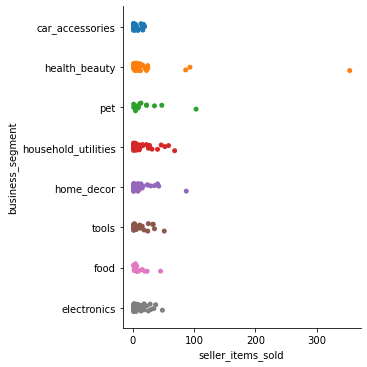

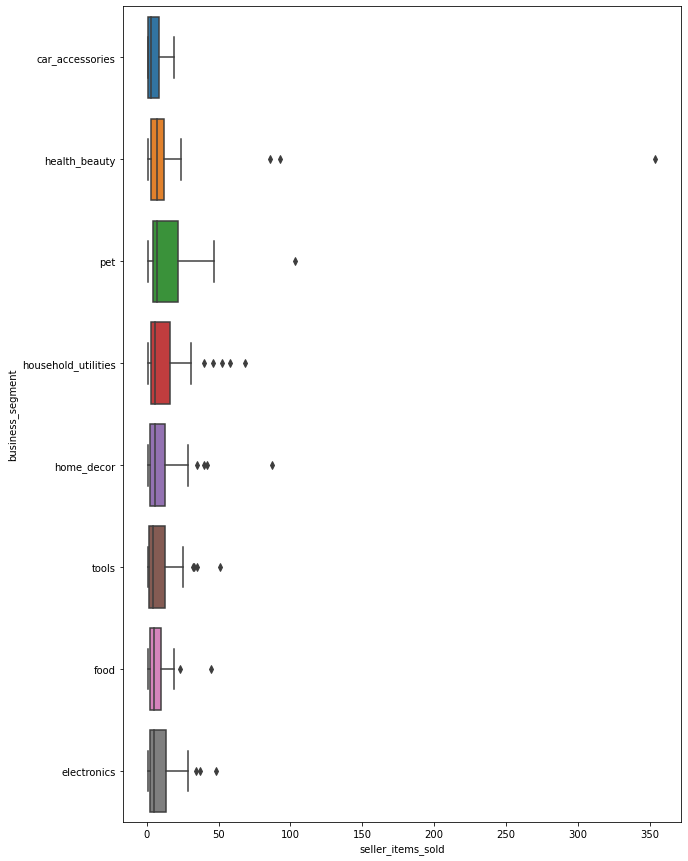

In [84]:
# for top 8 business segments (in terms of no. of sellers)
# merge lead & seller data
temp = sellerData.merge(l, on="seller_id")

# visualisation
sb.catplot(data = temp, x="seller_items_sold", y="business_segment")

fig = plt.figure(figsize = (10,15))
sb.boxplot(x = "seller_items_sold", y= "business_segment", data = temp)

### leadData - Business Segment: categorical
### Response 2: product

<AxesSubplot:xlabel='product_items_sold', ylabel='business_segment'>

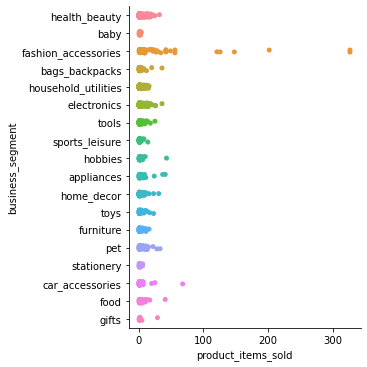

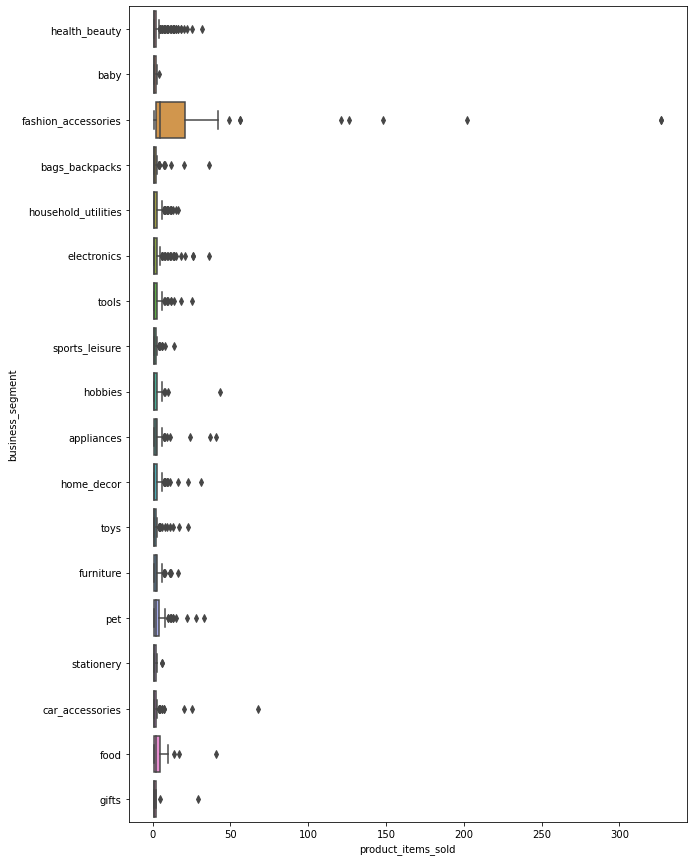

In [85]:
# merge lead & product data
temp = orderData.merge(leadData, on="seller_id").merge(productData, on="product_id")
temp.drop_duplicates(subset=["seller_id", "product_id"], inplace=True)

# visualisation
sb.catplot(data = temp, x="product_items_sold", y="business_segment")

fig = plt.figure(figsize = (10,15))
sb.boxplot(x = "product_items_sold", y= "business_segment", data = temp)

<AxesSubplot:xlabel='product_items_sold', ylabel='business_segment'>

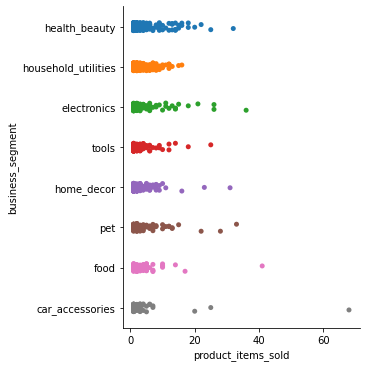

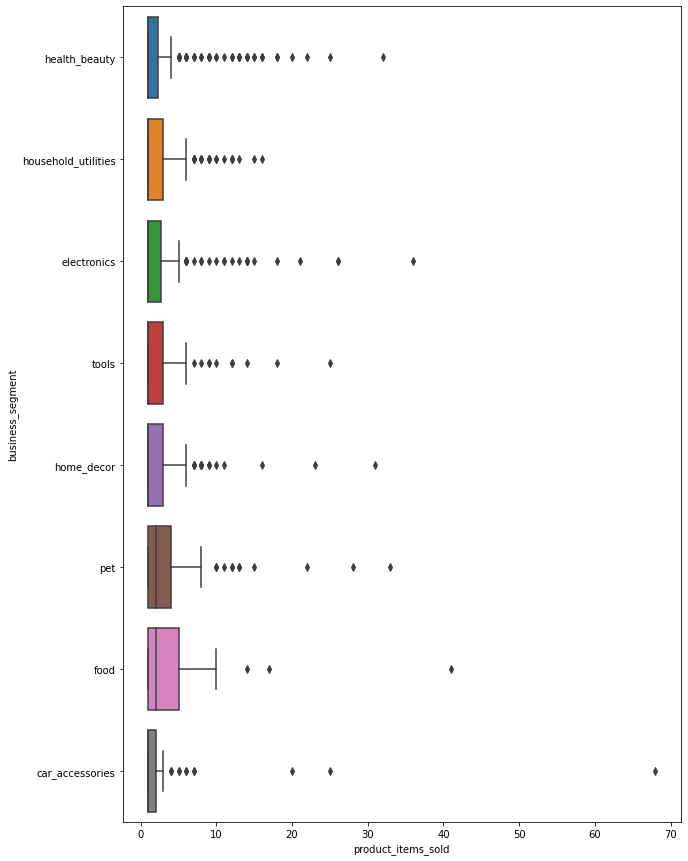

In [86]:
# for top 8 business segments (in terms of no. of sellers)
# merge lead & product data
temp = orderData.merge(l, on="seller_id").merge(productData, on="product_id")
temp.drop_duplicates(subset=["seller_id", "product_id"], inplace=True)

# visualisation
sb.catplot(data = temp, x="product_items_sold", y="business_segment")

fig = plt.figure(figsize = (10,15))
sb.boxplot(x = "product_items_sold", y= "business_segment", data = temp)

### leadData - lead type: categorical
### Response 1: seller

In [87]:
leadData["lead_type"].value_counts()

online_medium      172
online_big          79
industry            41
offline             30
online_small        28
online_beginner     21
online_top           6
Name: lead_type, dtype: int64

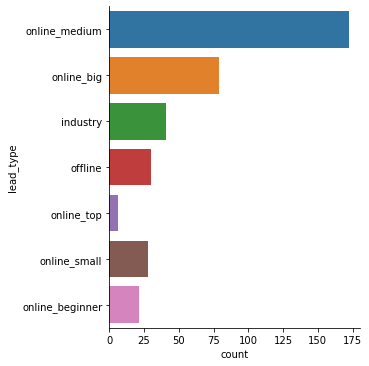

In [88]:
sb.catplot(data=leadData, y="lead_type", kind="count")

<AxesSubplot:xlabel='seller_items_sold', ylabel='lead_type'>

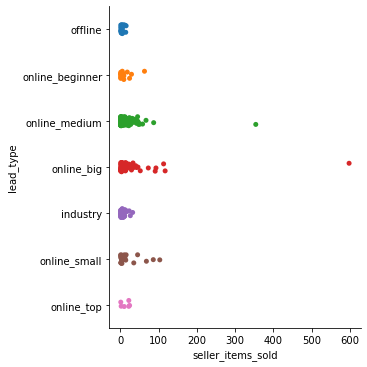

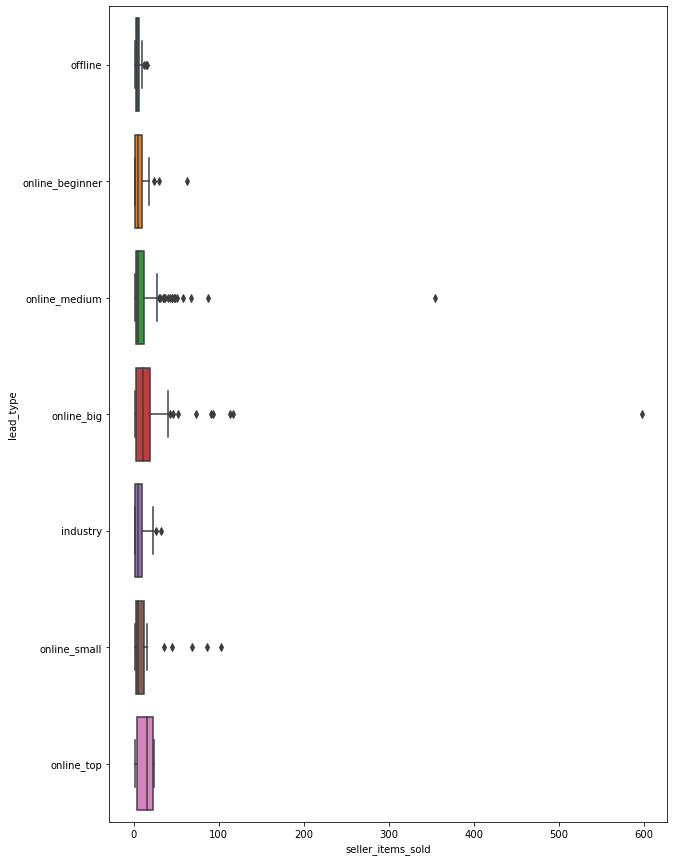

In [89]:
# merge lead & seller data
temp = sellerData.merge(leadData, on="seller_id")

# visualisation
sb.catplot(data = temp, x="seller_items_sold", y="lead_type")

fig = plt.figure(figsize = (10,15))
sb.boxplot(x = "seller_items_sold", y= "lead_type", data = temp)

<AxesSubplot:xlabel='seller_items_sold', ylabel='lead_type'>

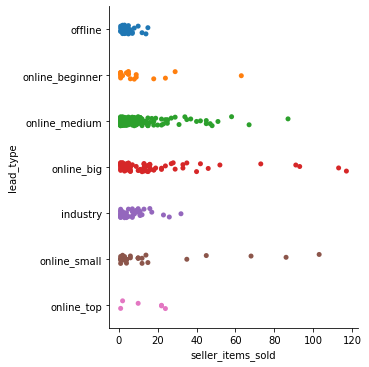

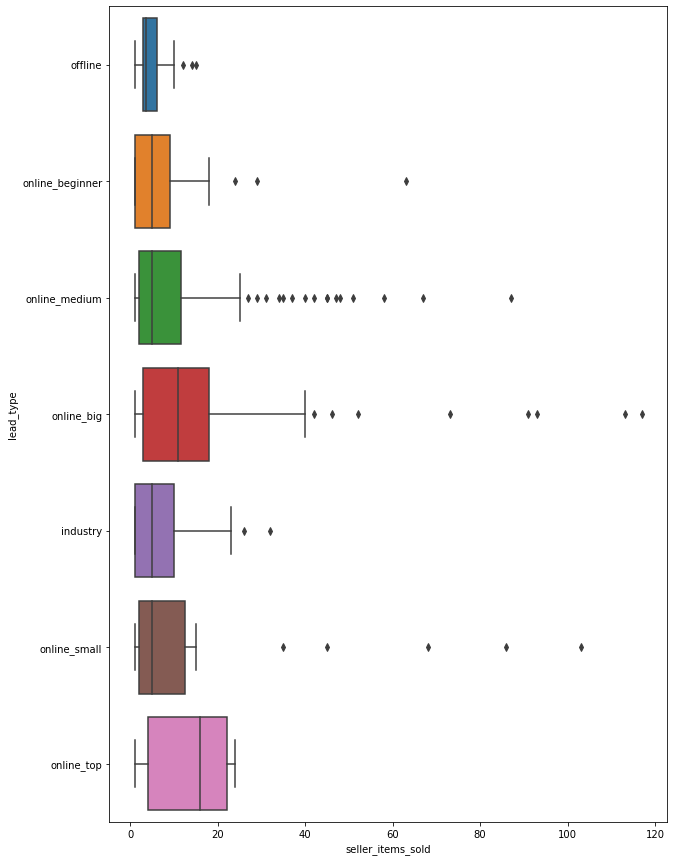

In [90]:
# removing the 2 outliers
l = temp[temp["seller_items_sold"] < 300]

# visualisation
sb.catplot(data = l, x="seller_items_sold", y="lead_type")

fig = plt.figure(figsize = (10,15))
sb.boxplot(x = "seller_items_sold", y= "lead_type", data = l)

### leadData - lead type: categorical
### Response 2: product

<AxesSubplot:xlabel='product_items_sold', ylabel='lead_type'>

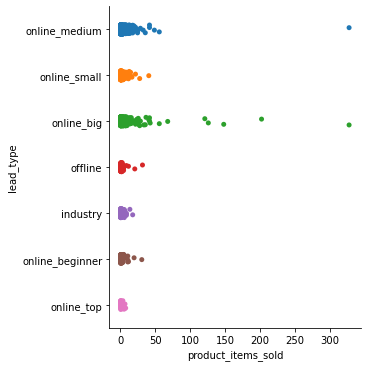

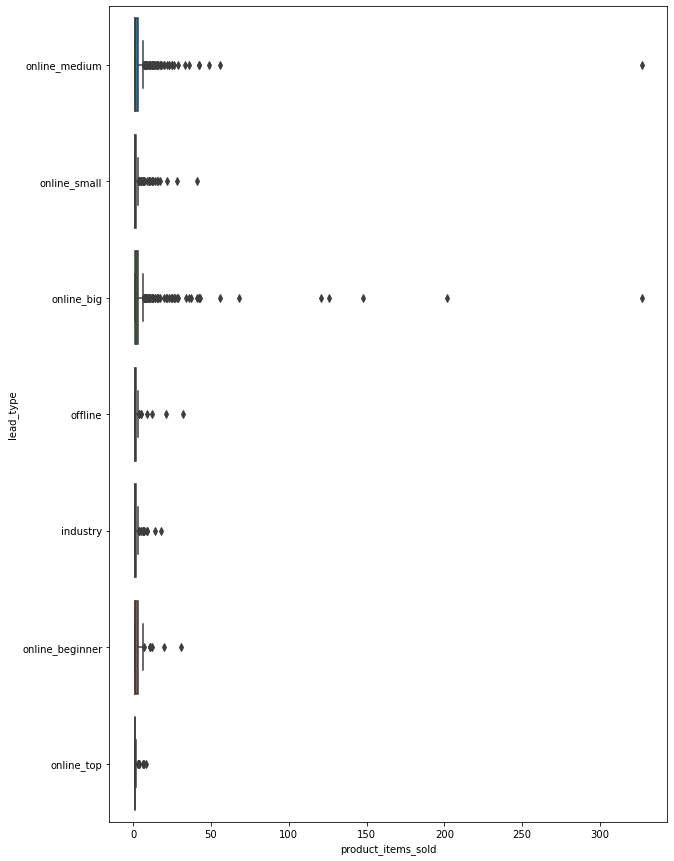

In [91]:
# merge lead & product data
temp = orderData.merge(leadData, on="seller_id").merge(productData, on="product_id")
temp.drop_duplicates(subset=["seller_id", "product_id"], inplace=True)

# visualisation
sb.catplot(data = temp, x="product_items_sold", y="lead_type")

fig = plt.figure(figsize = (10,15))
sb.boxplot(x = "product_items_sold", y= "lead_type", data = temp)

<AxesSubplot:xlabel='product_items_sold', ylabel='lead_type'>

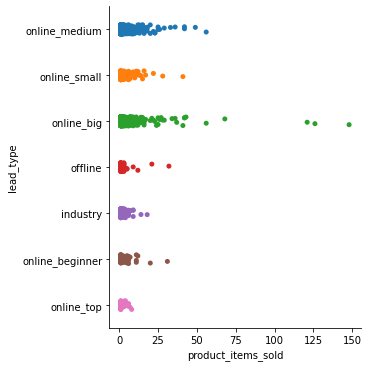

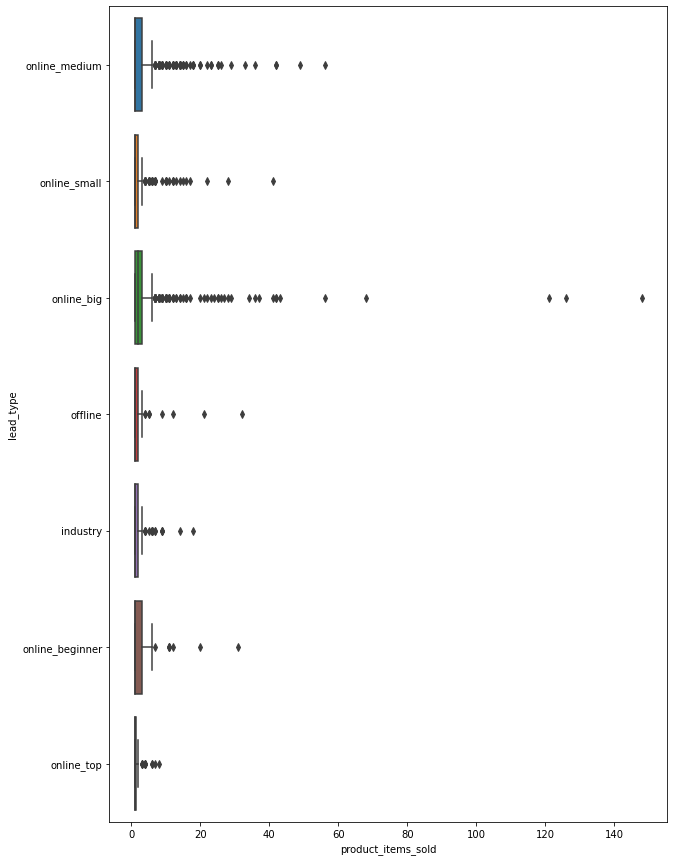

In [92]:
# removing the outliers
l = temp[temp["product_items_sold"] < 200]

# visualisation
sb.catplot(data = l, x="product_items_sold", y="lead_type")

fig = plt.figure(figsize = (10,15))
sb.boxplot(x = "product_items_sold", y= "lead_type", data = l)

<AxesSubplot:xlabel='product_items_sold', ylabel='lead_type'>

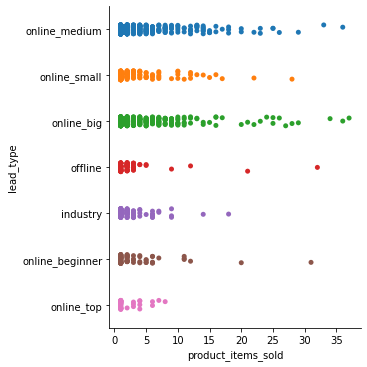

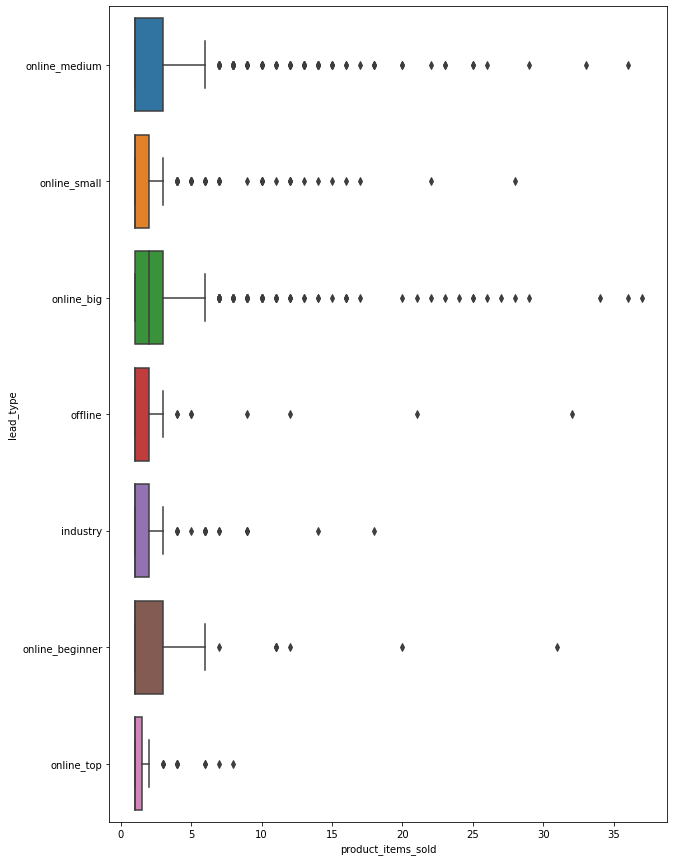

In [93]:
# removing more outliers
l = temp[temp["product_items_sold"] < 40]

# visualisation
sb.catplot(data = l, x="product_items_sold", y="lead_type")

fig = plt.figure(figsize = (10,15))
sb.boxplot(x = "product_items_sold", y= "lead_type", data = l)

### leadData - Lead Behaviour Profile: categorical
### Response 1: seller

In [94]:
leadData["lead_behaviour_profile"].value_counts()

cat           184
eagle          50
wolf           43
shark          10
eagle, cat      1
cat, wolf       1
Name: lead_behaviour_profile, dtype: int64

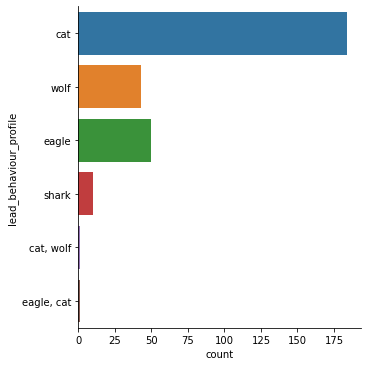

In [95]:
sb.catplot(data=leadData, y="lead_behaviour_profile", kind="count")

<AxesSubplot:xlabel='seller_items_sold', ylabel='lead_behaviour_profile'>

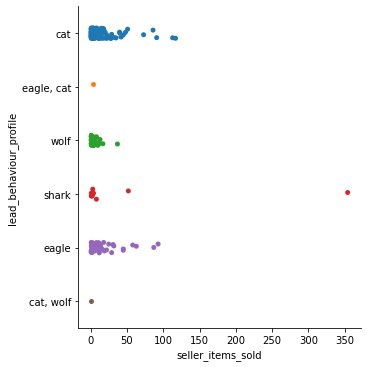

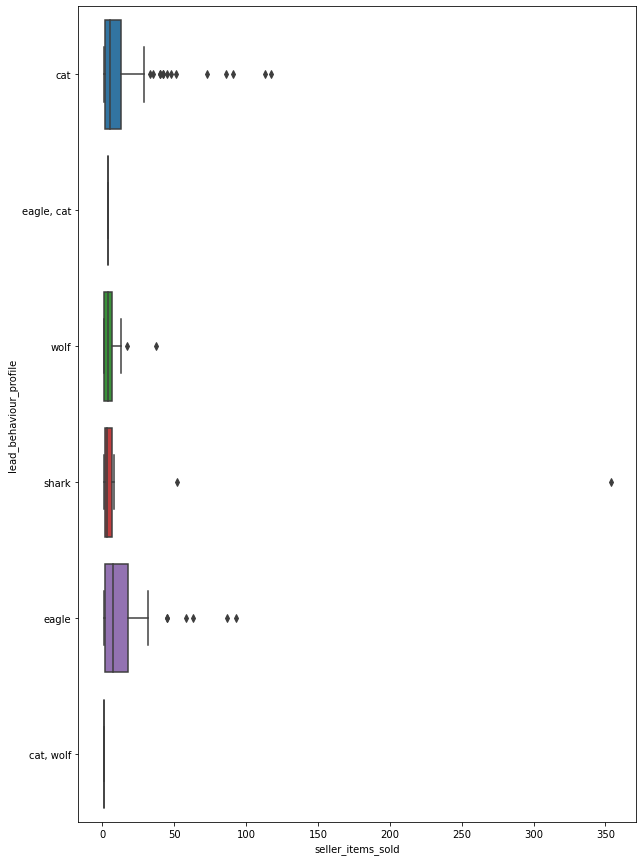

In [96]:
# merge lead & seller data
temp = sellerData.merge(leadData, on="seller_id")

# visualisation
sb.catplot(data = temp, x="seller_items_sold", y="lead_behaviour_profile")

fig = plt.figure(figsize = (10,15))
sb.boxplot(x = "seller_items_sold", y= "lead_behaviour_profile", data = temp)

<AxesSubplot:xlabel='seller_items_sold', ylabel='lead_behaviour_profile'>

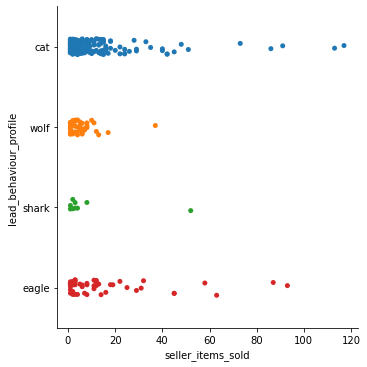

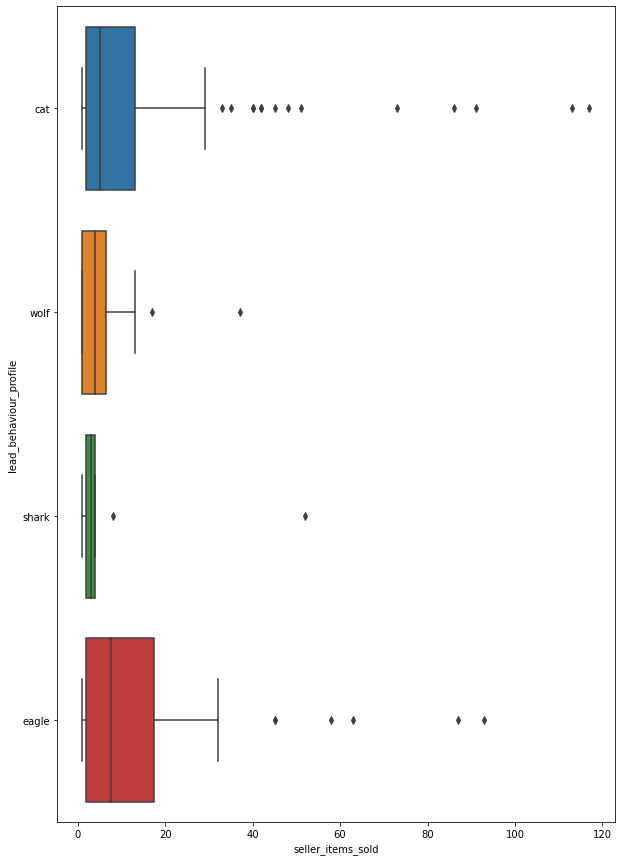

In [98]:
# removing outliers & the 2 profiles with 2 types
temp = temp[temp["seller_items_sold"] < 200]
temp = temp[(temp["lead_behaviour_profile"] != 'cat, wolf') & (temp["lead_behaviour_profile"] != 'eagle, cat')]

# visualisation
sb.catplot(data = temp, x="seller_items_sold", y="lead_behaviour_profile")

fig = plt.figure(figsize = (10,15))
sb.boxplot(x = "seller_items_sold", y= "lead_behaviour_profile", data = temp)

### leadData - Lead Behaviour Profile: categorical
### Response 2: product

<AxesSubplot:xlabel='product_items_sold', ylabel='lead_behaviour_profile'>

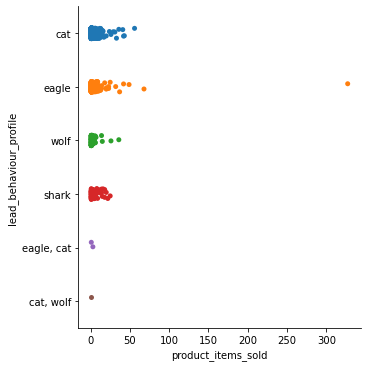

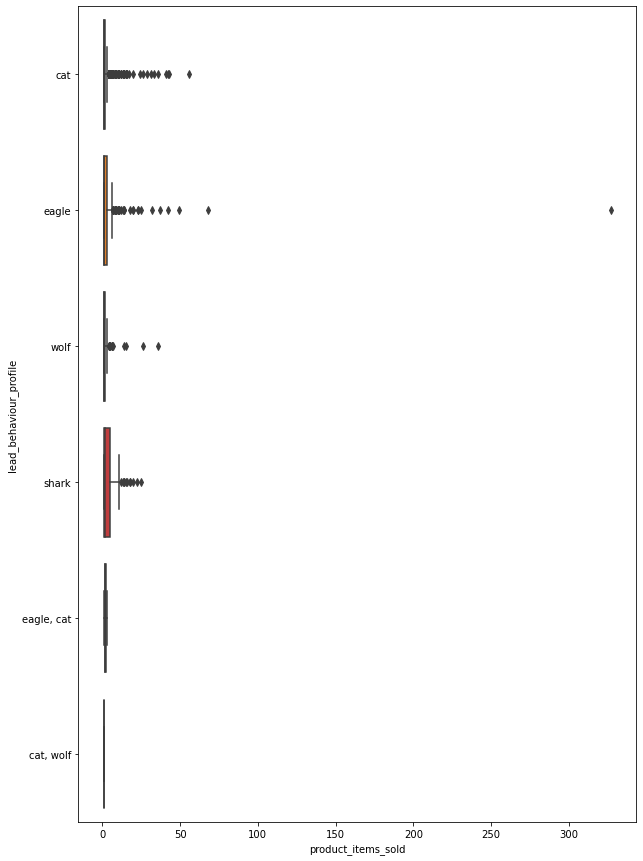

In [99]:
# merge lead & product data
temp = orderData.merge(leadData, on="seller_id").merge(productData, on="product_id")
temp.drop_duplicates(subset=["seller_id", "product_id"], inplace=True)

# visualisation
sb.catplot(data = temp, x="product_items_sold", y="lead_behaviour_profile")

fig = plt.figure(figsize = (10,15))
sb.boxplot(x = "product_items_sold", y= "lead_behaviour_profile", data = temp)

<AxesSubplot:xlabel='product_items_sold', ylabel='lead_behaviour_profile'>

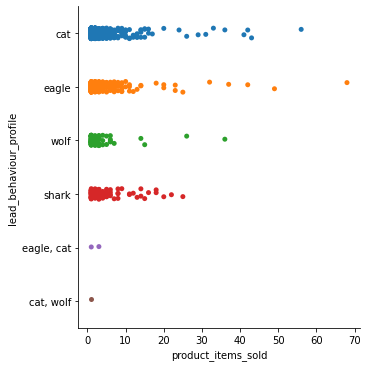

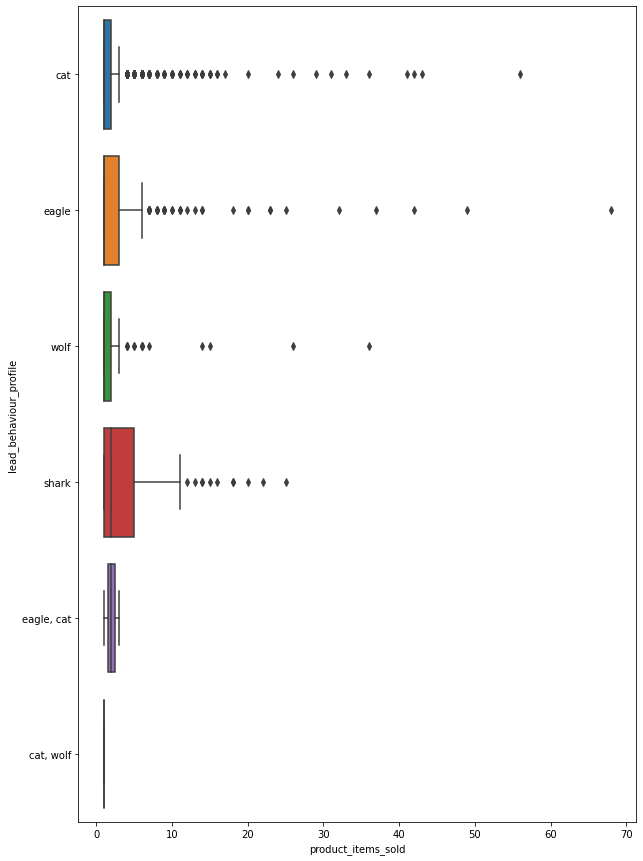

In [100]:
# removing the outliers
l = temp[temp["product_items_sold"] < 200]

# visualisation
sb.catplot(data = l, x="product_items_sold", y="lead_behaviour_profile")

fig = plt.figure(figsize = (10,15))
sb.boxplot(x = "product_items_sold", y= "lead_behaviour_profile", data = l)

### leadData - business type: categorical
### Response 1: seller

In [101]:
leadData["business_type"].value_counts()

reseller        287
manufacturer     90
Name: business_type, dtype: int64

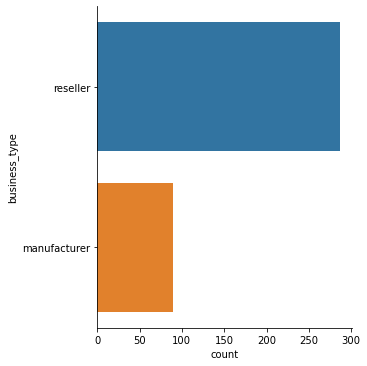

In [102]:
sb.catplot(data=leadData, y="business_type", kind="count")

<AxesSubplot:xlabel='seller_items_sold', ylabel='business_type'>

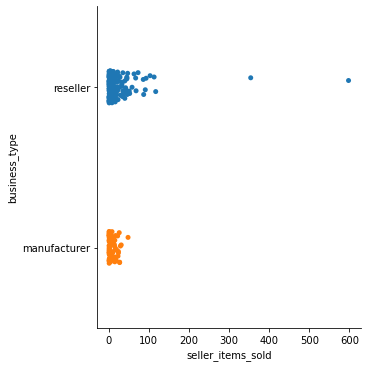

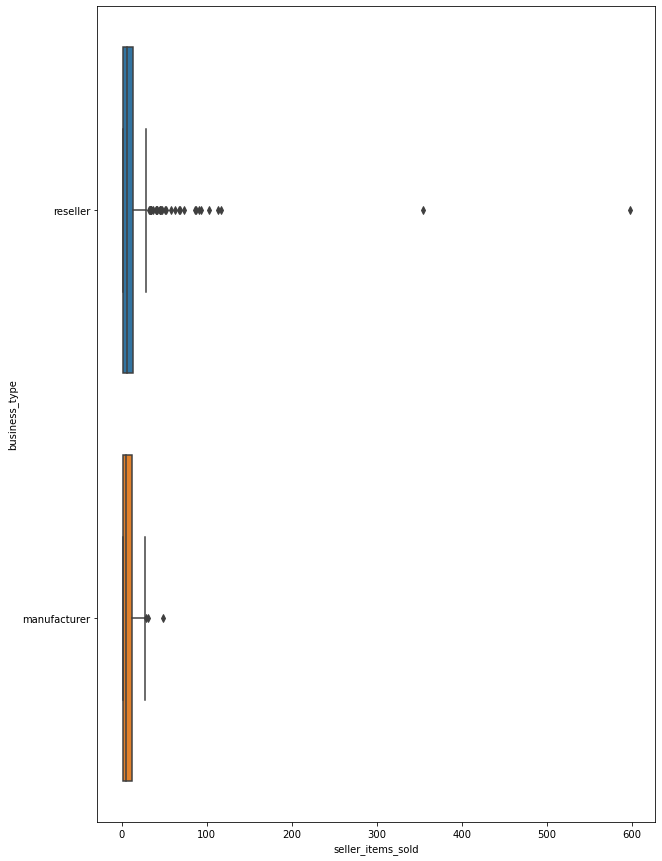

In [103]:
# merge lead & seller data
temp = sellerData.merge(leadData, on="seller_id")

# visualisation
sb.catplot(data = temp, x="seller_items_sold", y="business_type")

fig = plt.figure(figsize = (10,15))
sb.boxplot(x = "seller_items_sold", y= "business_type", data = temp)

<AxesSubplot:xlabel='seller_items_sold', ylabel='business_type'>

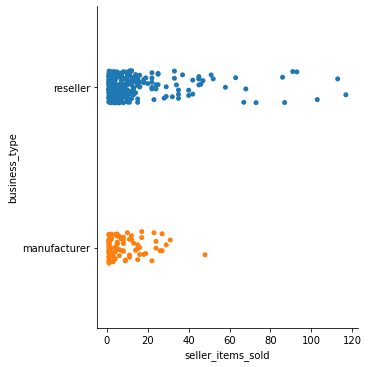

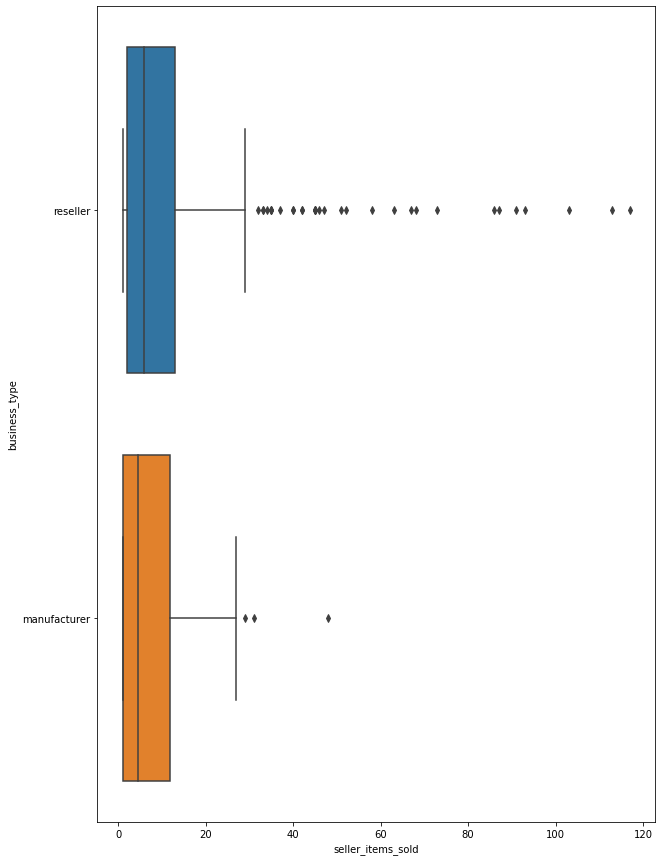

In [104]:
# removing the 2 outliers
l = temp[temp["seller_items_sold"] < 300]

# visualisation
sb.catplot(data = l, x="seller_items_sold", y="business_type")

fig = plt.figure(figsize = (10,15))
sb.boxplot(x = "seller_items_sold", y= "business_type", data = l)

### leadData - business type: categorical
### Response 2: product

<AxesSubplot:xlabel='product_items_sold', ylabel='business_type'>

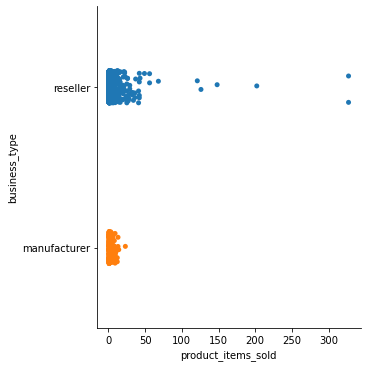

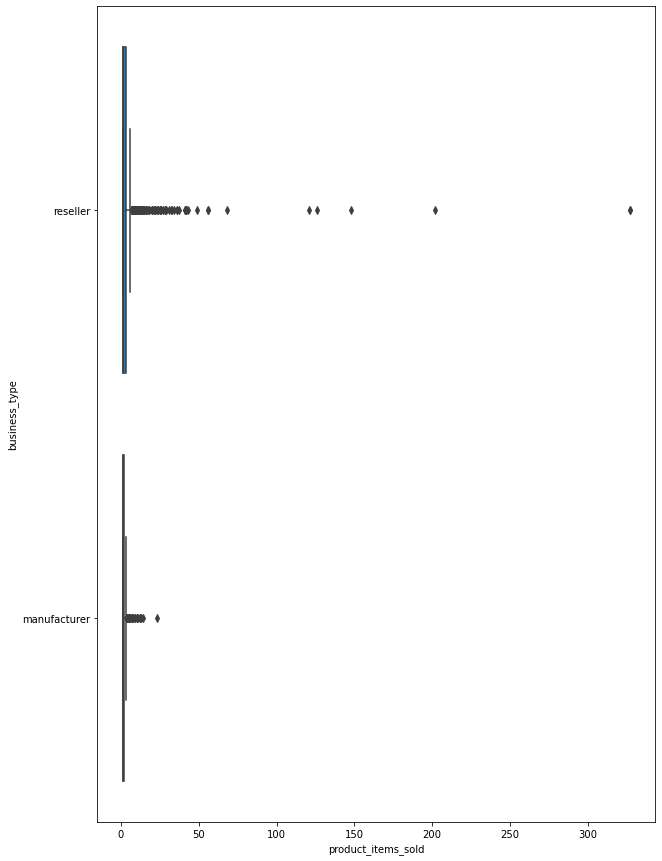

In [105]:
# merge lead & product data
temp = orderData.merge(leadData, on="seller_id").merge(productData, on="product_id")
temp.drop_duplicates(subset=["seller_id", "product_id"], inplace=True)

# visualisation
sb.catplot(data = temp, x="product_items_sold", y="business_type")

fig = plt.figure(figsize = (10,15))
sb.boxplot(x = "product_items_sold", y= "business_type", data = temp)

<AxesSubplot:xlabel='product_items_sold', ylabel='business_type'>

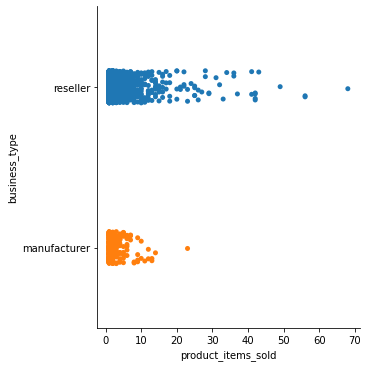

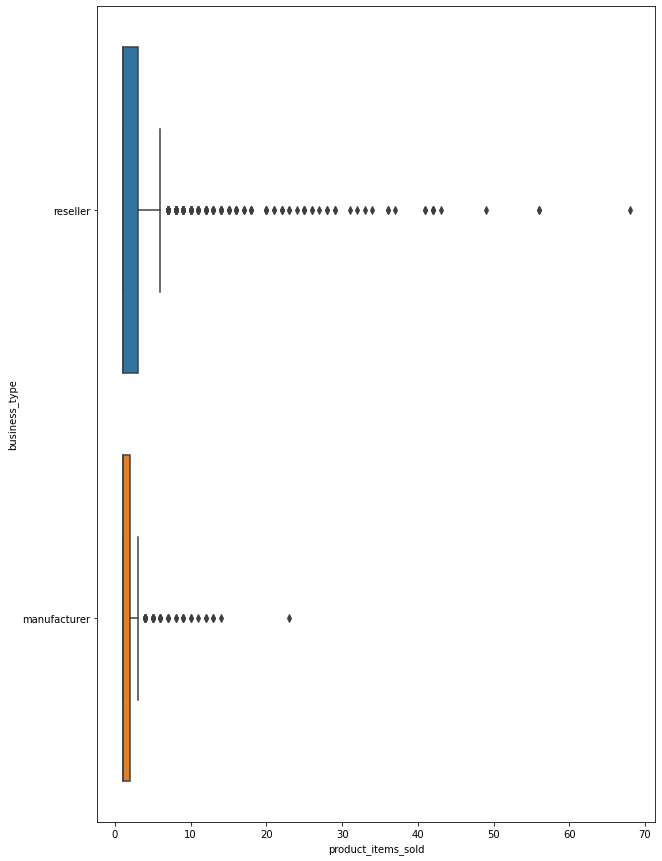

In [106]:
# removing the outliers
l = temp[temp["product_items_sold"] < 80]

# visualisation
sb.catplot(data = l, x="product_items_sold", y="business_type")

fig = plt.figure(figsize = (10,15))
sb.boxplot(x = "product_items_sold", y= "business_type", data = l)

### leadData - days to first sale: numeric
### Response 1: seller

In [107]:
leadData["days_to_first_sale"].describe()

count    380.00000
mean      51.65000
std       36.73044
min        3.00000
25%       22.00000
50%       44.00000
75%       72.00000
max      220.00000
Name: days_to_first_sale, dtype: float64

<AxesSubplot:>

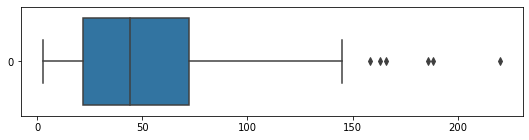

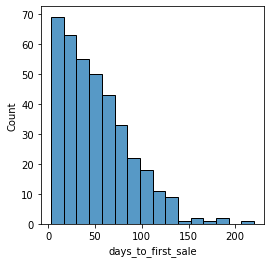

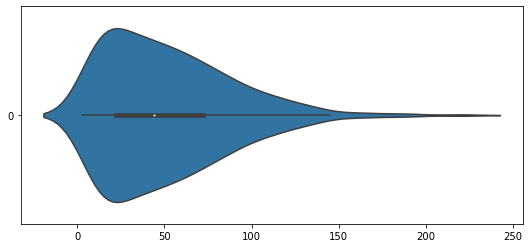

In [108]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=leadData["days_to_first_sale"], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=leadData["days_to_first_sale"])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=leadData["days_to_first_sale"], orient = 'h')

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

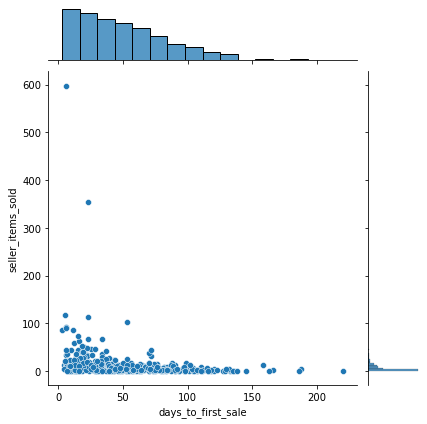

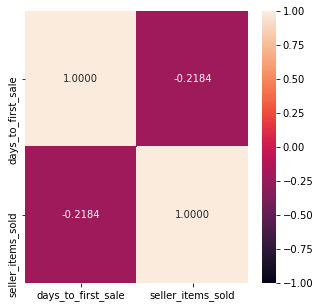

In [109]:
# merge lead & seller data
temp = sellerData.merge(leadData, on="seller_id")

fig = plt.figure(figsize = (8,8))
sb.jointplot(data = temp, x="days_to_first_sale", y="seller_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(temp[["days_to_first_sale", "seller_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

### leadData - days to first sale: numeric
### Response 2: product

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

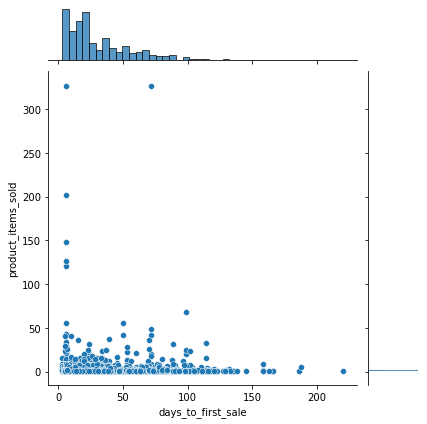

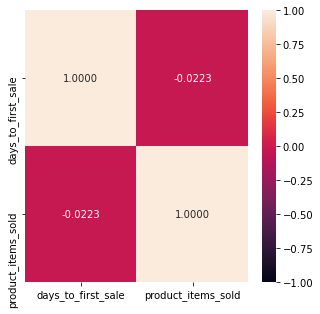

In [110]:
# merge lead & product data
temp = orderData.merge(leadData, on="seller_id").merge(productData, on="product_id")
temp.drop_duplicates(subset=["seller_id", "product_id"], inplace=True)

fig = plt.figure(figsize = (8,8))
sb.jointplot(data = temp, x="days_to_first_sale", y="product_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(temp[["days_to_first_sale", "product_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

# need a days_to_first_sale of each product variable..?

### leadData - deal days: numeric
### Response 1: seller

In [111]:
leadData["deal_days"].describe()

count    380.000000
mean      28.055263
std       50.806941
min       -2.000000
25%        4.000000
50%       10.000000
75%       25.250000
max      369.000000
Name: deal_days, dtype: float64

<AxesSubplot:>

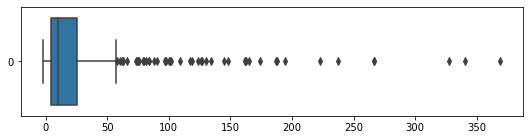

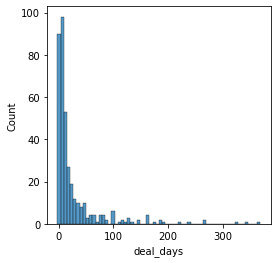

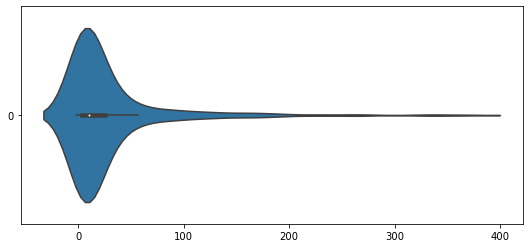

In [112]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=leadData["deal_days"], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=leadData["deal_days"])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=leadData["deal_days"], orient = 'h')

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

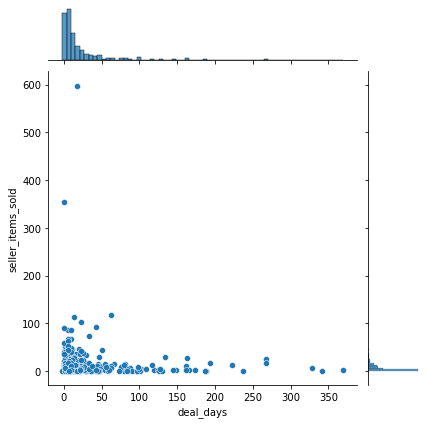

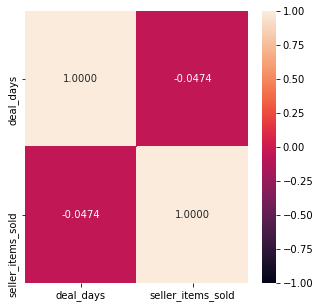

In [113]:
# merge lead & seller data
temp = sellerData.merge(leadData, on="seller_id")

fig = plt.figure(figsize = (8,8))
sb.jointplot(data = temp, x="deal_days", y="seller_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(temp[["deal_days", "seller_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

### leadData - deal days: numeric
### Response 2: product

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

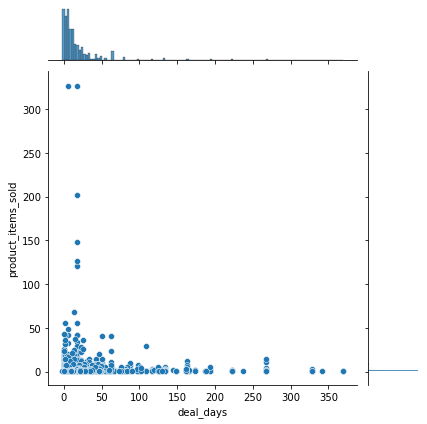

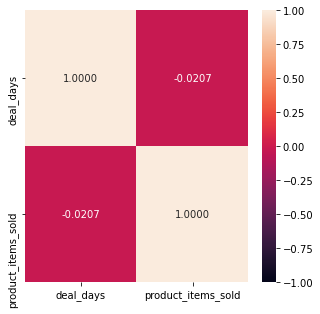

In [114]:
# merge lead & product data
temp = orderData.merge(leadData, on="seller_id").merge(productData, on="product_id")
temp.drop_duplicates(subset=["seller_id", "product_id"], inplace=True)

fig = plt.figure(figsize = (8,8))
sb.jointplot(data = temp, x="deal_days", y="product_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(temp[["deal_days", "product_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

In [116]:
orderData[orderData["seller_id"].isna()]

,order_id,order_item_id,seller_id,product_id,customer_id,review_id,order_status,price,payment_type,payment_installments,payment_time,lead_time,delivery_performance,review_score,review_time,review_en,polarity
319,8e24261a7e58791d10cb1bf9da94df5c,NaN,NaN,NaN,64a254d30eed42cd0e6c36dddb88adf0,7fb04ba6e8b915c62557517d5c1e04ee,unavailable,NaN,credit_card,5.0,0.0,NaN,NaN,1,4,Advertise a product that does not have in stoc...,0.00
702,c272bcd21c287498b4883c7512019702,NaN,NaN,NaN,9582c5bbecc65eb568e2c1d839b5cba1,b6ea5566d6060db04ebe53a1291e4541,unavailable,NaN,credit_card,1.0,0.0,NaN,NaN,3,2,NaN,0.00
828,37553832a3a89c9b2db59701c357ca67,NaN,NaN,NaN,7607cd563696c27ede287e515812d528,aaeb804fe1828db8cc3d8b52ec38a1fa,unavailable,NaN,boleto,1.0,2.0,NaN,NaN,1,2,To date I have not received my product and not...,-0.20
887,d57e15fb07fd180f06ab3926b39edcd2,NaN,NaN,NaN,470b93b3f1cde85550fc74cd3a476c78,519e62c42f33dce5b47ffddf9fde28df,unavailable,NaN,boleto,1.0,0.0,NaN,NaN,1,0,Do not buy,0.00
1362,00b1cb0320190ca0daa2c88b35206009,NaN,NaN,NaN,3532ba38a3fd242259a514ac2b6ae6b6,9c0d840dfe562debfa52a1792bd64bff,canceled,NaN,not_defined,1.0,NaN,NaN,NaN,1,0,Gave wrong product bought two headsets with th...,-0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118922,aaab15da689073f8f9aa978a390a69d1,NaN,NaN,NaN,df20748206e4b865b2f14a5eabbfcf34,396e26da77b10734f3f8b5d5515fef4e,unavailable,NaN,boleto,1.0,0.0,NaN,NaN,1,0,"A BOSTA NOT DELIVERY, AND DOES NOT VALUE CHAR...",0.00
118954,3a3cddda5a7c27851bd96c3313412840,NaN,NaN,NaN,0b0d6095c5555fe083844281f6b093bb,16d3db296c46b4411dfc5f8bde882e6d,canceled,NaN,voucher,1.0,NaN,NaN,NaN,5,1,NaN,0.00
119047,a89abace0dcc01eeb267a9660b5ac126,NaN,NaN,NaN,2f0524a7b1b3845a1a57fcf3910c4333,047fd109ced39e02296f6aeb74f6a6f1,canceled,NaN,voucher,1.0,NaN,NaN,NaN,4,2,NaN,0.00
119048,a69ba794cc7deb415c3e15a0a3877e69,NaN,NaN,NaN,726f0894b5becdf952ea537d5266e543,41b9de18e0dd1e085e3c402d1c9b87d0,unavailable,NaN,credit_card,2.0,4.0,NaN,NaN,1,0,I purchased this product for gifting a person....,-0.25
